### Doing the MNIST example, but using Tensor Flow

In [110]:
from tensorflow import keras
import tensorflow as tf
import matplotlib.pyplot as plt
import glob
import os
import matplotlib.image as mpimg
import numpy as np

In [111]:
print(tf.__version__)

1.13.1


In [112]:
mnist = keras.datasets.mnist

In [113]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data() 

In [114]:
train_images.shape

(60000, 28, 28)

In [115]:
type(test_images)

numpy.ndarray

([], <a list of 0 Text yticklabel objects>)

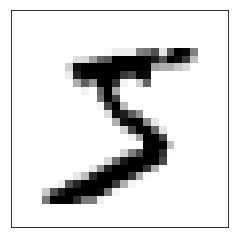

In [116]:
plt.figure()
plt.imshow(train_images[0], cmap = 'binary')
plt.xticks([])
plt.yticks([])

In [117]:
train_images[0].shape

(28, 28)

In [118]:
# Normalizing the data
test_images = test_images/255.0
train_images = train_images/255.0

In [119]:
test_images.shape

(10000, 28, 28)

In [120]:
# Define the model architecture
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [121]:
# Compile the model
model.compile(optimizer=tf.train.AdamOptimizer(), loss='sparse_categorical_crossentropy', metrics = ['accuracy'])

In [122]:
# Train the model
model.fit(train_images, train_labels, epochs = 20)

Epoch 1/20
60000/60000 [==============================] - 8s 125us/sample - loss: 0.2257 - acc: 0.9329
Epoch 2/20
60000/60000 [==============================] - 7s 116us/sample - loss: 0.0982 - acc: 0.9700
Epoch 3/20
60000/60000 [==============================] - 6s 108us/sample - loss: 0.0667 - acc: 0.9797
Epoch 4/20
60000/60000 [==============================] - 7s 111us/sample - loss: 0.0510 - acc: 0.9833
Epoch 5/20
60000/60000 [==============================] - 7s 110us/sample - loss: 0.0408 - acc: 0.9868
Epoch 6/20
60000/60000 [==============================] - 7s 111us/sample - loss: 0.0344 - acc: 0.9892
Epoch 7/20
60000/60000 [==============================] - 7s 111us/sample - loss: 0.0290 - acc: 0.9903
Epoch 8/20
60000/60000 [==============================] - 7s 112us/sample - loss: 0.0245 - acc: 0.9917
Epoch 9/20
60000/60000 [==============================] - 7s 109us/sample - loss: 0.0222 - acc: 0.9925
Epoch 10/20
60000/60000 [==============================] - 7s 111us/sampl

In [123]:
# Evaluate network performance on the test set
test_loss, test_accuracy = model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 1s 53us/sample - loss: 0.1116 - acc: 0.9784


In [124]:
test_images.shape

(10000, 28, 28)

### Now to test my own images with the network



     Actual label (Predicted label)


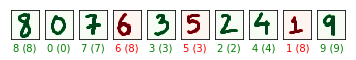

In [127]:
all_images = np.zeros((10, 28, 28))
actual_labels = [8, 0, 7, 6, 3, 5, 2, 4, 1, 9]

for i in range(n_examples):
    img = mpimg.imread(files[i])
    img = np.sum(img, axis=2)/3.
    img = 1-img # So that black pixels are 'hot', and the background is white.
    plt.subplot(1, n_examples, i+1)
    predicted_label = np.argmax(model.predict(img.reshape(1, 28, 28)))
    if(predicted_label == actual_labels[i]):
        plt.imshow(img, cmap = 'Greens')
        color = 'green'
    else:
        plt.imshow(img, cmap = 'Reds')
        color = 'red'
    plt.xlabel(str(actual_labels[i]) + " ("+str(predicted_label)+")", color = color)
    plt.xticks([])
    plt.yticks([])
    
    
    predicted_labels += str(predicted_label) + " "
    #predicted_labels += str(np.argmax(net.feedforward(img.reshape(784, 1)))) + " "
    #print(model.predict(img))

print("\n\n     Actual label (Predicted label)")

### An example that shows how 'bad' scaling can affect the model prediction
The far left image shows a correctly scaled image, while the second image shows a badly scaled image
The far right image shows the badly scaled image with adjusted colorbar, so that the digit is visible

8 0


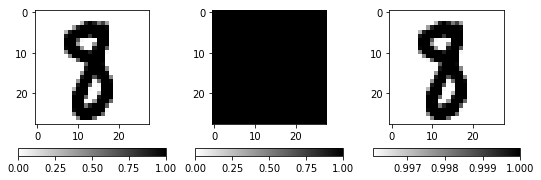

In [140]:
i = 0
img = mpimg.imread(files[i])

img1 = np.sum(img, axis=2)/3. # The right scaling
img2 = (np.sum(img, axis=2)/3.)/255. # The wrong scaling
img1 = 1. - img1
img2 = 1. - img2

plt.figure(figsize=(9, 3))
plt.subplot(1, 3, 1)
plt.imshow(img1, cmap = 'binary', vmin = 0, vmax = 1)
plt.colorbar(orientation = 'horizontal')

plt.subplot(1, 3, 2)
plt.imshow(img2, cmap = 'binary', vmin = 0, vmax = 1)
plt.colorbar(orientation = 'horizontal')

plt.subplot(1, 3, 3)
plt.imshow(img2, cmap = 'binary')
plt.colorbar(orientation = 'horizontal')

print(np.argmax(model.predict(img1.reshape(1, 28, 28))), np.argmax(model.predict(img2.reshape(1, 28, 28))))